In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pp
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from collections import Counter

In [55]:
traindata = pd.read_csv('train.csv')

In [56]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


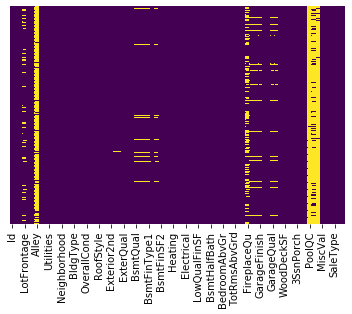

In [57]:
sns.heatmap(traindata.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [59]:
traindata.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

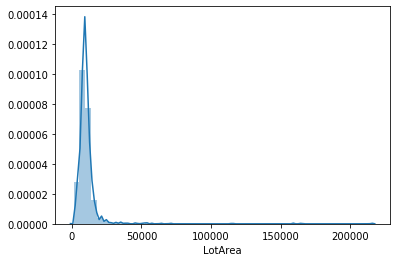

In [60]:
sns.distplot(traindata['LotArea'])

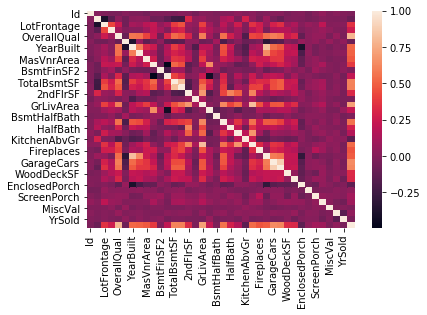

In [61]:
sns.heatmap(traindata.corr())

In [62]:
traindata['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [63]:
#list of variables which have categorical values
catvar = ['LotShape', 'LandContour', 'LandSlope','MSSubClass', 'MSZoning', 'Street','Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

#list of variables which have ordinal values
ordvar = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond' ]


#list of variables which have integer values
numvar = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [73]:
#Manually mapping ordinal features to correlating number value
traindata['ExterQual'] = traindata['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
traindata['ExterCond'] = traindata['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
traindata['BsmtQual'] = traindata['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA': 0})
traindata['BsmtCond'] = traindata['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA': 0})
traindata['BsmtExposure'] = traindata['BsmtExposure'].map({'Gd': 5, 'Av': 4, 'Mn': 3, 'No':2, 'NA':1})
traindata['HeatingQC'] = traindata['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
traindata['KitchenQual'] = traindata['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
traindata['GarageQual'] = traindata['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA': 0})
traindata['GarageCond'] = traindata['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA': 0})

In [74]:
X = traindata.drop('SalePrice', axis = 1)
y = traindata['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [75]:
def baseline_model():
    num_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'mean')),#imputes numerical variables to the mean
        ('scaler', StandardScaler())#standardizes features by removing mean and scaling to unit variance (Z score)
    ])
    cat_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'constant',
                                  fill_value = 'NULL')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
    ])
    
    preproc = ColumnTransformer(transformers = [
        ('cat', cat_transformer, catvar), 
        ('num', num_transformer, numvar)
    ])
    pl = Pipeline(steps = [('preprocessor', preproc), ('regressor', LinearRegression())])
    return pl


In [76]:
new_model = baseline_model()
new_model.fit(X_train,y_train)
y_predictions = new_model.predict(X_test)
loss = np.sqrt(np.sum((y_predictions - y_test)**2))
np.sqrt(mean_squared_log_error(y_test,abs(y_predictions)))

0.2092075075103349

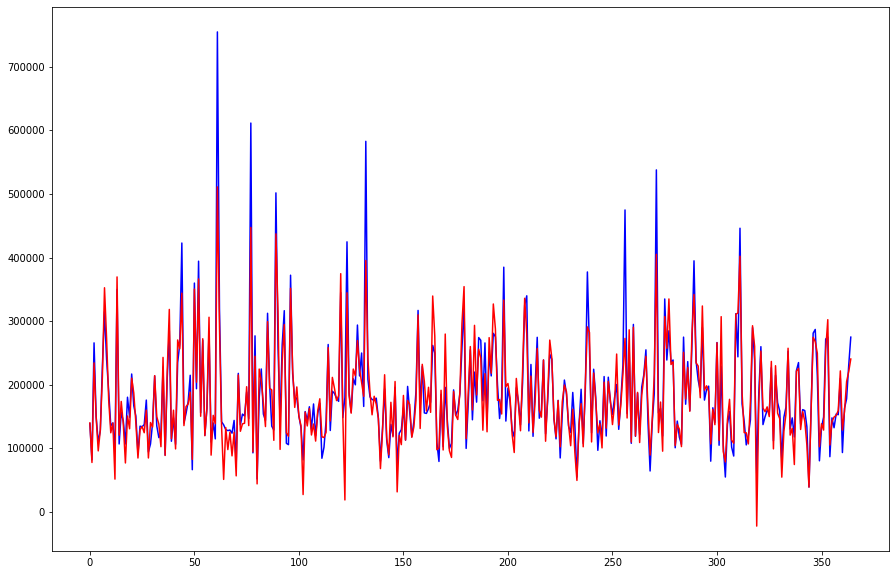

In [77]:
pred_dimensions = (15,10)
fig, ax = pyplot.subplots(figsize = pred_dimensions)
plt.plot(np.arange(0,len(y_test)), y_test, c = 'b')
plt.plot(np.arange(0,len(y_test)), y_predictions, c = 'r')


In [79]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
#PCA Attempt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#Ridge Attempt
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)


In [80]:

#Numerical Data - not using Pipeline, MinMaxScaler
scaler = MinMaxScaler()
X[numvar] = scaler.fit_transform(X[numvar])
X = X.fillna(X.mean())
#traindata

#Categorical Data - not using Pipeline, pandas dummies
X = pd.get_dummies(X, columns = catvar)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)